<a href="https://colab.research.google.com/github/bemadi/Project-2/blob/main/Project_2_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting the Quality of Red and White Wines**

# **Data Cleaning**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('/content/drive/MyDrive/Data/winequality.csv')

In [46]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Color,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Red,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Red,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Red,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Red,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Red,5


In [47]:
df.duplicated().sum()

1177

In [49]:
df.drop_duplicates(inplace=True)

In [50]:
df.duplicated().sum()

0

In [51]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# **Visualizations**

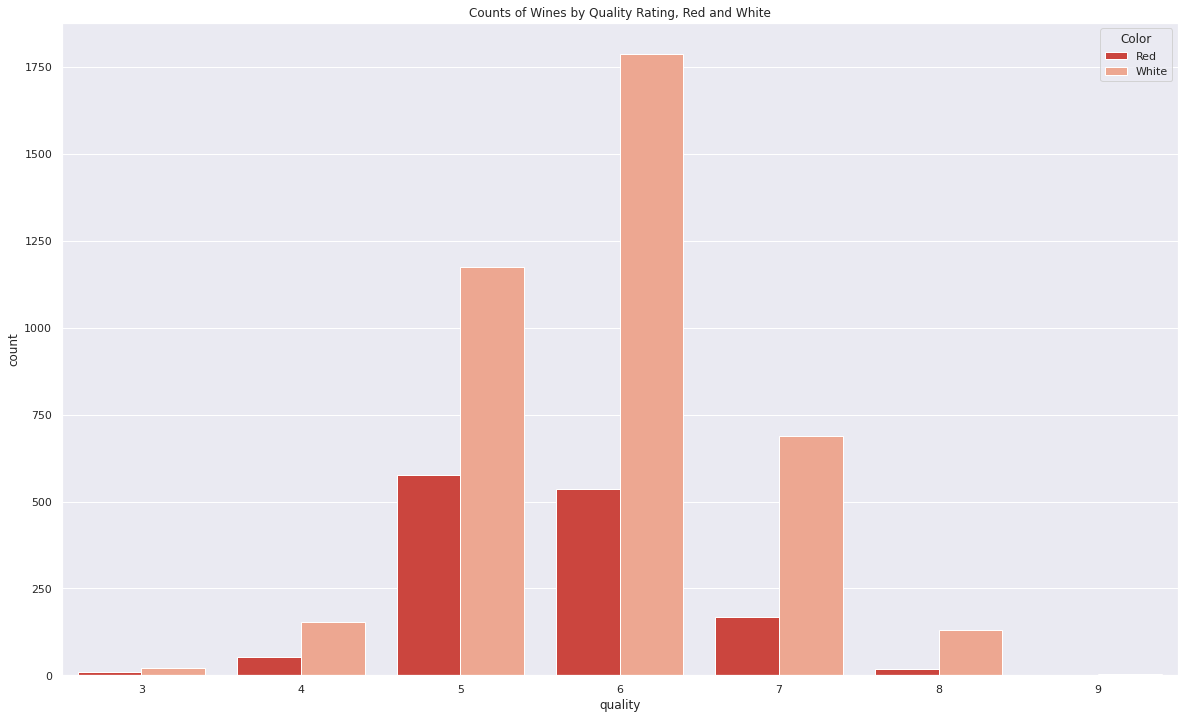

In [146]:
sns.countplot(data=df, x='quality', hue = 'Color', palette="Reds_r")
plt.title('Counts of Wines by Quality Rating, Red and White');

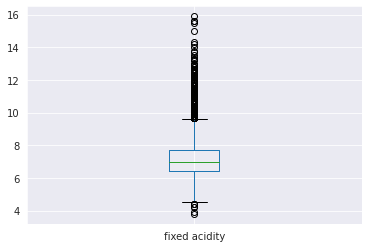

In [101]:
df.boxplot(column = 'fixed acidity');

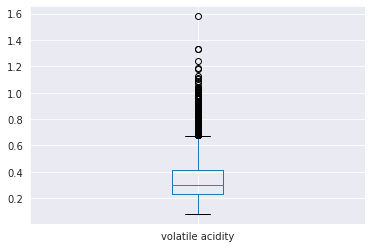

In [103]:
df.boxplot(column = 'volatile acidity');

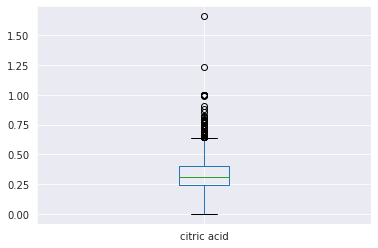

In [104]:
df.boxplot(column = 'citric acid');

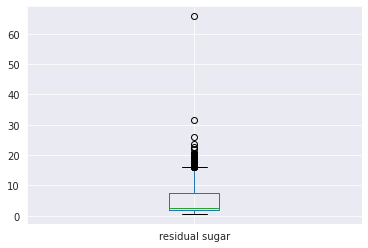

In [105]:
df.boxplot(column = 'residual sugar');

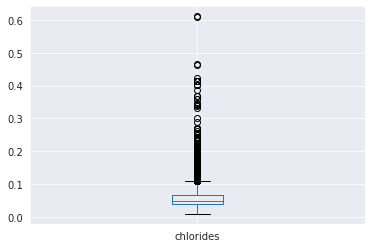

In [106]:
df.boxplot(column = 'chlorides');

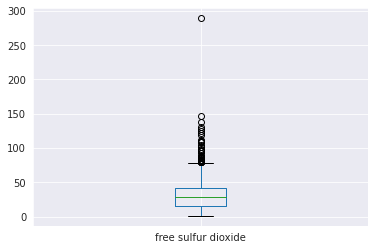

In [107]:
df.boxplot(column = 'free sulfur dioxide');

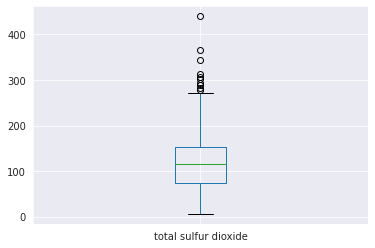

In [108]:
df.boxplot(column = 'total sulfur dioxide');

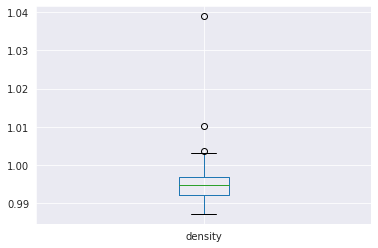

In [109]:
df.boxplot(column = 'density');

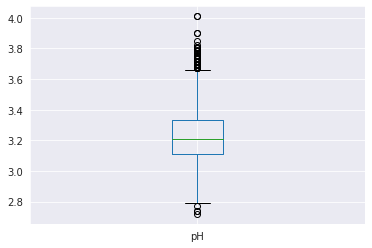

In [110]:
df.boxplot(column = 'pH');

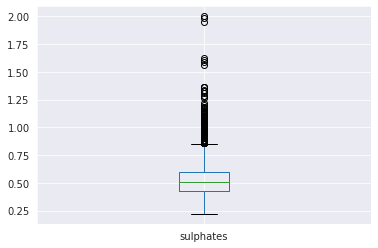

In [111]:
df.boxplot(column = 'sulphates');

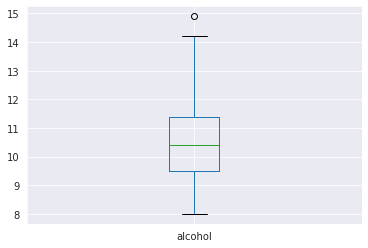

In [112]:
df.boxplot(column = 'alcohol');

According to our boxplots, there are substantial numbers of outliers within several of our columns; however, none of them seem unreasonable. Additionally, there are significantly more white wines in our data set than there are reds. We will have to take steps to ebsure our split data is properly balanced.    

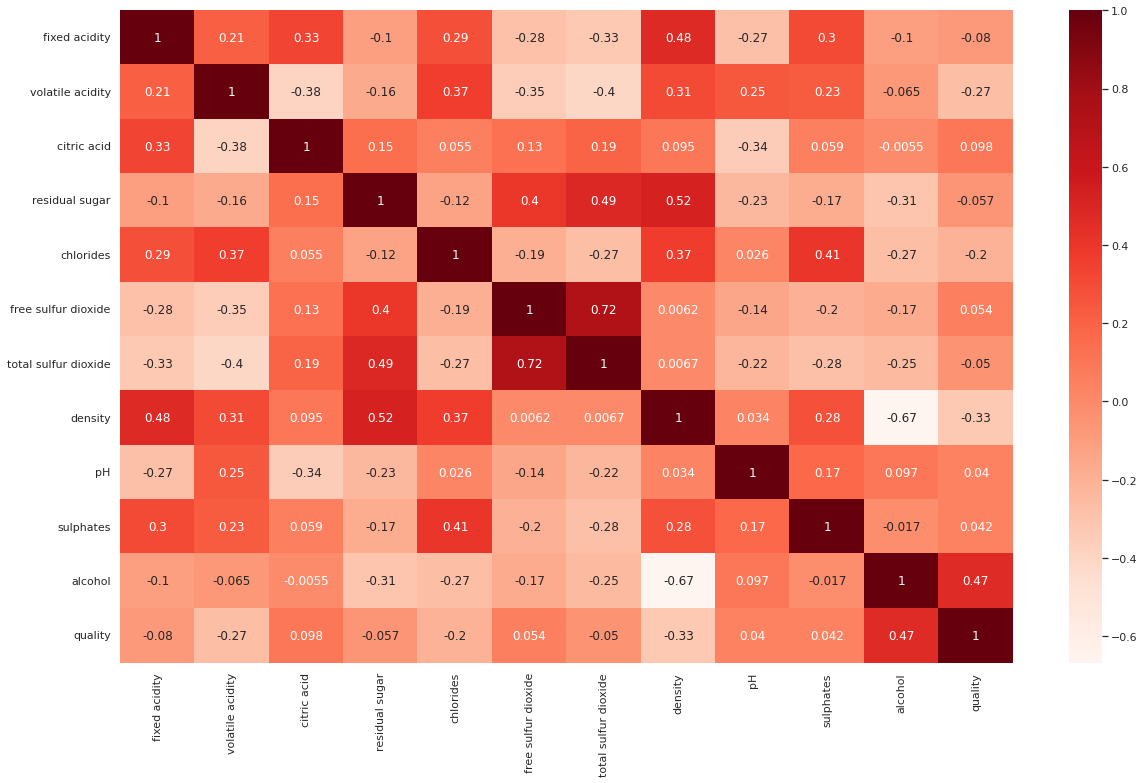

In [145]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap = 'Reds');
sns.set(rc={'figure.figsize':(20,12)})

The feature with the highest correlation to quality is the alcohol. All other features have low correlation to quality. 